# Pymaceuticals Inc. by Paola VDW
---

### Analysis
After conducting the merging, and data cleaning of the study results, we identified and removed a duplicate mouse (g989) from the dataset. We then calculated different statistical methods (mean, median, variance, standard deviation, and standard error of the mean) for each drug regimen. The highest-ranking drug was Ramicane, followed closely by our drug of interest, Capomulin. On the other hand, the lowest-ranking drug was Ketapril, which scored almost three times as much as Ramicane in the tumor volume variance calculation. The bar and pie charts illustrate that the mice treated with Ramicane and Capomulin had the highest number of observed timepoints compared to the other drugs, and that most of the mice were males (51%). In the middle of our analysis, only four drugs were evaluated: Capomulin, Ramicane, Infubinol, and Ceftamin. The drugs that had the lowest final tumor volume (mm3) were Ramicane and Capomulin. Ceftamin and Infubinol had the highest final tumor volume (mm3) with Infubinol being the only drug, out of the four, to show potential outliers (31 and 36.32). At the end of our analysis, we focused on Capomulin’s performance only. The line plot shows that the tumor volume (mm3) of the mice that were given the drug lowered as the days went by. The scatter plot illustrates the positive correlation between the weight (g) and the average tumor volume (mm3) of the mice (the highest the weight, the highest the average tumor volume). In conclusion, this analysis indicates that Capomulin’s performance has a better treatment efficacy in reducing tumor size compared to the other drugs, with the exception to Ramicane. 

In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [269]:
# Checking the number of mice.
mice_count = len(mouse_study["Mouse ID"].unique())
mice_count

249

In [270]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [271]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study['Mouse ID'] == 'g989'].head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [272]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop = mouse_study[mouse_study['Mouse ID'] != 'g989']
mouse_drop.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [273]:
# Checking the number of mice in the clean DataFrame.
mouse_drop_check = len(mouse_drop["Mouse ID"].unique())
mouse_drop_check 

248

## Summary Statistics

In [274]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Statistics = pd.DataFrame({"Mean Tumor Volume":"", "Median Tumor Volume": "", "Tumor Volume Variance": "", 
                                  "Tumor Volume Std. Dev": "", "Tumor Volume Std. Err": ""}, index=mouse_drop['Drug Regimen'].unique())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std_dev = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_SEM = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Summary_Statistics_Results = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                                           "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev": tumor_std_dev, 
                                           "Tumor Volume Std. Err": tumor_SEM})

Summary_Statistics_Results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [275]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single = mouse_drop.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_single

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

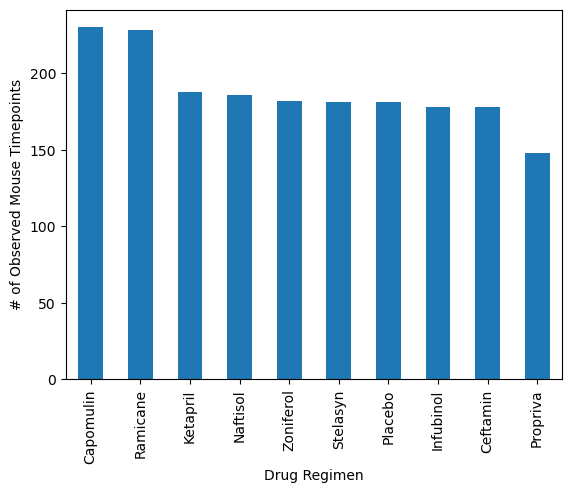

In [276]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_mice = mouse_drop["Drug Regimen"].value_counts()
mice_figure = observed_mice.plot(kind="bar", facecolor="tab:blue", xlabel="Drug Regimen", 
                                 ylabel="# of Observed Mouse Timepoints")
xticklabels = observed_mice.index
mice_figure.set_xticklabels(xticklabels)
plt.show()

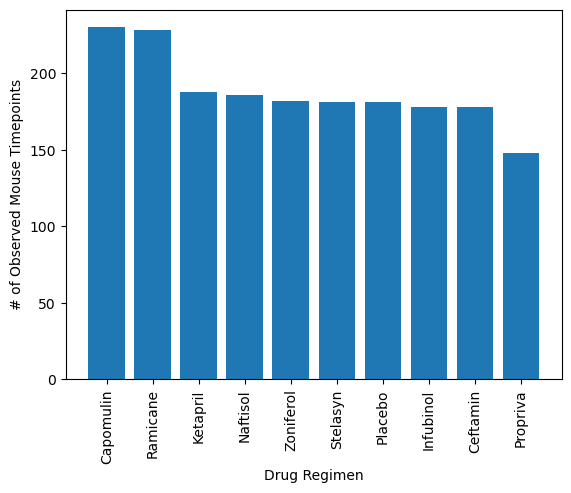

In [277]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mouse_drop["Drug Regimen"].value_counts()
x_axis = drugs.index

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, drugs, facecolor='tab:blue')
plt.xticks(x_axis, rotation="vertical")
plt.show()

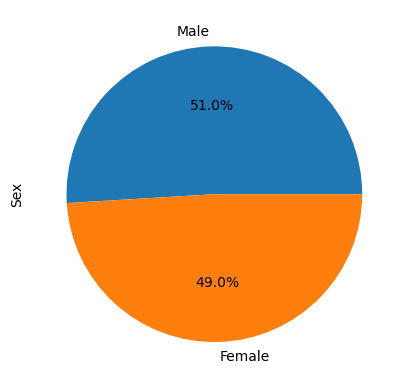

In [278]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type = mouse_drop['Sex'].value_counts()
pie_plot = sex_type.plot(kind="pie", autopct="%.1f%%")
pie_plot.set_ylabel('Sex')
plt.show()

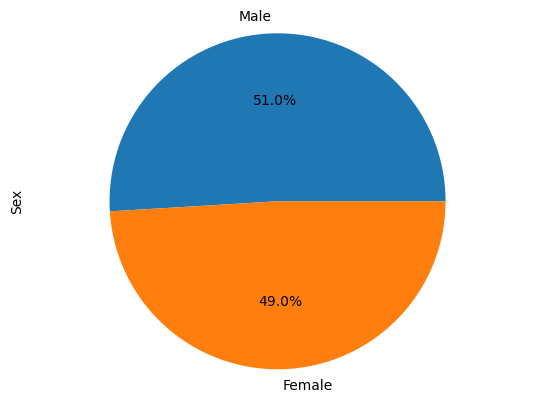

In [279]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_types_pyplot = mouse_drop['Sex'].value_counts()
sex_types = sex_types_pyplot.index

plt.ylabel("Sex")
plt.pie(sex_types_pyplot, labels= sex_types,autopct="%.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [280]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_drop.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint,mouse_drop, on=["Mouse ID", "Timepoint"], how='left')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [281]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatment_regimens:
    final_tumor_vol = merged_data.loc[(merged_data['Drug Regimen'] == regimen),'Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower 
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\baby4\AppData\Local\Temp\ipykernel_5588\3739366700.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatment_regimens)


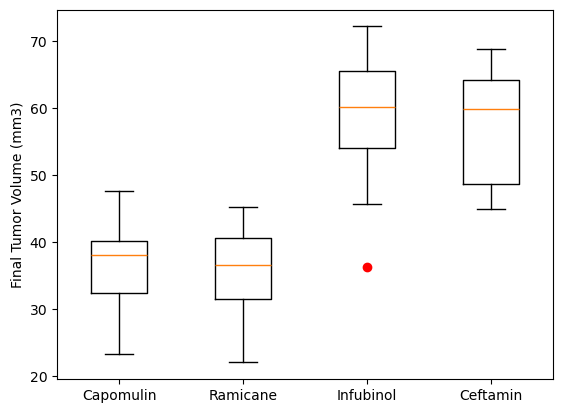

In [282]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatment_regimens)
ax1.boxplot(tumor_vol_data, sym="red")
plt.show()

## Line and Scatter Plots

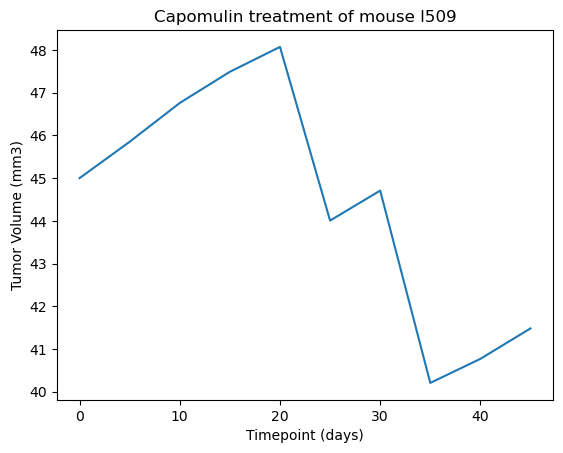

In [283]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_drop[mouse_drop['Mouse ID'] == 'l509']
x = mouse_l509['Timepoint'] 
y = mouse_l509['Tumor Volume (mm3)']

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x, y)

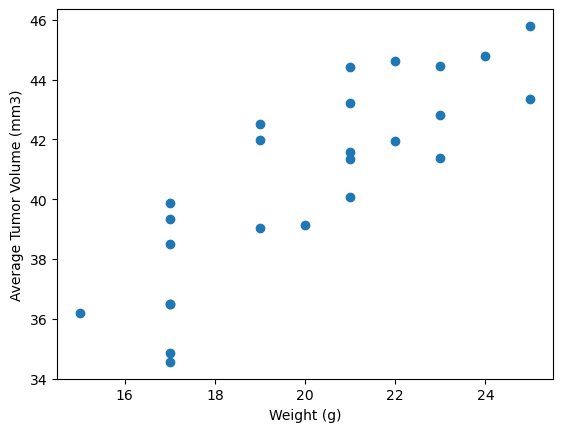

In [284]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_drop[mouse_drop['Drug Regimen'] == 'Capomulin']
capomulin_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(capomulin_weight, capomulin_tumor)
plt.show()

## Correlation and Regression

In [285]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_drop[mouse_drop['Drug Regimen'] == 'Capomulin']
capomulin_weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

corr_coe = np.corrcoef(capomulin_weight, capomulin_tumor)[0][1]
x = round(corr_coe,2)
print("The correlation between mouse weight and the average tumor volume is", x)

The correlation between mouse weight and the average tumor volume is 0.84


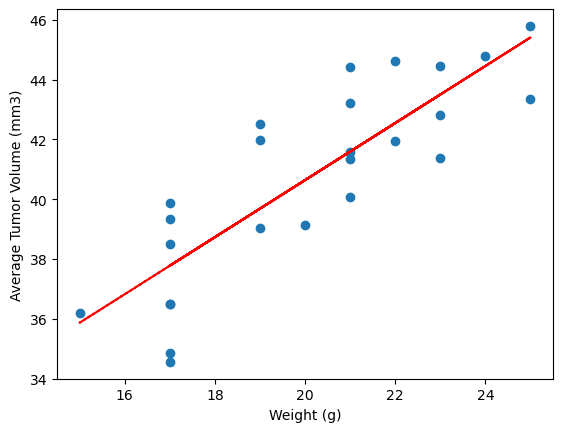

In [286]:
#linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(capomulin_weight, capomulin_tumor)
pe_fit = pe_slope * capomulin_weight + pe_int

plt.scatter(capomulin_weight, capomulin_tumor)
plt.plot(capomulin_weight,pe_fit,"--", color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()